In [320]:
# supervised machine learning regression scenario

# Predicting Salary of Software Developers

## Data Collection

In [321]:
# Bringing in some general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')

In [322]:
# Read the data using pandas and make a copy
df = pd.read_csv('../datasets/full/2020/survey_results_public.csv', na_values='?', comment = '\t', sep=',', skipinitialspace=True)

# data = df.copy()

# Creating a new dataframe which only contains US data
data_us = df[data.Country == 'United States']

In [323]:
# Confirming the data read was successful
data_us.sample(10)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
56823,57948,I am a student who is learning to code,Yes,NaN,35,NaN,NaN,NaN,United States,NaN,...,Easy,Too long,No,"A social science (such as anthropology, psycho...",Angular;Angular.js;Express;Gatsby;jQuery;React...,Angular;Angular.js;Express;jQuery;React.js;Vue.js,A lot more welcome now than last year,NaN,Less than 1 year,NaN
52771,53858,I am a student who is learning to code,Yes,30.0,29,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,No,"A natural science (such as biology, chemistry,...",NaN,Express;jQuery;React.js,A lot less welcome now than last year,NaN,1,NaN
35057,35184,I am a developer by profession,Yes,32.0,19,Yearly,120000.0,120000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core;React.js,ASP.NET;ASP.NET Core;jQuery;React.js,Just as welcome now as I felt last year,40.0,14,9
48557,49565,I am a developer by profession,Yes,24.0,19,Yearly,89000.0,89000.0,United States,United States dollar,...,Easy,Too long,No,"A natural science (such as biology, chemistry,...",React.js,jQuery,Just as welcome now as I felt last year,40.0,6,2
27521,27623,"I am not primarily a developer, but I write co...",Yes,40.0,9,Monthly,330000.0,2000000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,NaN,31,25
40455,41057,I am a developer by profession,Yes,NaN,NaN,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2183,2192,I code primarily as a hobby,Yes,16.0,10,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,NaN,6,NaN
48845,49856,I am a developer by profession,No,30.0,13,Yearly,164000.0,164000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"A natural science (such as biology, chemistry,...",jQuery,jQuery,Just as welcome now as I felt last year,38.0,12,5
27582,27685,I am a student who is learning to code,Yes,NaN,12,NaN,NaN,NaN,United States,NaN,...,Easy,Too long,No,NaN,Vue.js,Vue.js,Not applicable - I did not use Stack Overflow ...,NaN,3,NaN
5157,5176,I am a developer by profession,Yes,26.0,16,Yearly,182000.0,182000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"A social science (such as anthropology, psycho...",Express,Express,Just as welcome now as I felt last year,50.0,9,5


### Problem Statement:
The data contains ConvertedComp data which is continous data and tells us the total compensation of the developer.

The aim is to **predict the total compensation for a developer** given we have the feature variables for a potential candidate.

In [324]:
# Looking at information about the data
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12469 entries, 4 to 64456
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    12469 non-null  int64  
 1   MainBranch                    12438 non-null  object 
 2   Hobbyist                      12469 non-null  object 
 3   Age                           9619 non-null   float64
 4   Age1stCode                    11785 non-null  object 
 5   CompFreq                      8632 non-null   object 
 6   CompTotal                     8171 non-null   float64
 7   ConvertedComp                 8152 non-null   float64
 8   Country                       12469 non-null  object 
 9   CurrencyDesc                  9767 non-null   object 
 10  CurrencySymbol                9767 non-null   object 
 11  DatabaseDesireNextYear        8479 non-null   object 
 12  DatabaseWorkedWith            9763 non-null   object 
 13  D

In [325]:
# Data set contains 60 columns, we only want to focus on some of those

pd.options.mode.chained_assignment = None  # default='warn'

data_us.drop(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal' ,'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange', 'WorkWeekHrs', 'YearsCodePro'], axis=1, inplace=True)

In [326]:
# Looking at information about the data after dropping some columns (returns 12,469 rows)
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12469 entries, 4 to 64456
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  8152 non-null   float64
 1   Country        12469 non-null  object 
 2   EdLevel        11732 non-null  object 
 3   YearsCode      11759 non-null  object 
dtypes: float64(1), object(3)
memory usage: 487.1+ KB


In [327]:
data_us.sample(20)

,ConvertedComp,Country,EdLevel,YearsCode
5057,NaN,United States,Some college/university study without earning ...,5
34490,131500.0,United States,Some college/university study without earning ...,15
25085,1080000.0,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18
4835,NaN,United States,NaN,3
41889,NaN,United States,Primary/elementary school,1
50311,130000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",19
39678,NaN,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",12
28406,72800.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7
43539,NaN,United States,NaN,NaN
52966,NaN,United States,Some college/university study without earning ...,Less than 1 year


In [328]:
# Checking the counts of null values in the US data
data_us.isnull().sum()

ConvertedComp    4317
Country             0
EdLevel           737
YearsCode         710
dtype: int64

In [329]:
# Analyzing only data where target variable is reported in survey
data_us.dropna(subset=['ConvertedComp'], inplace=True)
data_us.isnull().sum()

ConvertedComp     0
Country           0
EdLevel          52
YearsCode        20
dtype: int64

In [330]:
# Analyzing only data where feature variable is reported in survey
data_us.dropna(subset=['YearsCode'], inplace=True)
data_us.isnull().sum()

ConvertedComp     0
Country           0
EdLevel          51
YearsCode         0
dtype: int64

In [331]:
# Analyzing only data where feature variable is reported in survey
data_us.dropna(subset=['EdLevel'], inplace=True)
data_us.isnull().sum()

ConvertedComp    0
Country          0
EdLevel          0
YearsCode        0
dtype: int64

In [332]:
# Looking at information about the data after dropping some rows (returns 8,081 rows)
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8081 entries, 7 to 64152
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  8081 non-null   float64
 1   Country        8081 non-null   object 
 2   EdLevel        8081 non-null   object 
 3   YearsCode      8081 non-null   object 
dtypes: float64(1), object(3)
memory usage: 315.7+ KB


In [333]:
data_us.sample(20)

,ConvertedComp,Country,EdLevel,YearsCode
2708,60000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6
19124,150000.0,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",39
26061,115000.0,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",3
4099,2000000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4
17453,1380000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10
53790,125000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10
39501,58000.0,United States,Some college/university study without earning ...,8
6257,95000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6
58177,2000000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25
45480,185000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10


In [334]:
data_us.describe()

,ConvertedComp
count,8.081000e+03
mean,2.091044e+05
std,3.732002e+05
min,0.000000e+00
25%,8.320000e+04
50%,1.150000e+05
75%,1.600000e+05
max,2.000000e+06


<AxesSubplot:xlabel='ConvertedComp'>

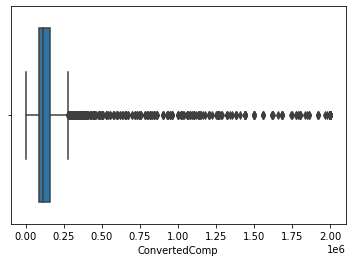

In [335]:
sns.boxplot(x=data_us['ConvertedComp'])

In [336]:
data_us['YearsCode'] = data_us['YearsCode'].replace(['More than 50 years', 'Less than 1 year'], ['51', '0'])

In [337]:
# category distribution, looking for unique values
data_us['YearsCode'].value_counts()

10    631
20    482
6     423
8     421
7     412
5     388
15    381
12    356
25    298
9     276
4     252
11    232
14    230
16    220
13    219
30    212
3     208
18    196
17    184
22    168
40    158
35    136
23    136
21    126
19    120
2     115
24    111
26     94
38     85
27     70
28     65
37     64
36     58
32     57
34     56
29     45
42     43
1      42
33     36
45     35
31     34
43     32
41     30
39     29
51     27
44     24
0      14
46     14
47     10
50     10
48      9
49      7
Name: YearsCode, dtype: int64

In [338]:
# category distribution, looking for unique values
data_us['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          4721
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       1479
Some college/university study without earning a degree                                 925
Associate degree (A.A., A.S., etc.)                                                    407
Other doctoral degree (Ph.D., Ed.D., etc.)                                             279
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     178
Professional degree (JD, MD, etc.)                                                      40
I never completed any formal education                                                  28
Primary/elementary school                                                               24
Name: EdLevel, dtype: int64

In [339]:
# Making sure data is floats and/or ints (ignoring Country)
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8081 entries, 7 to 64152
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  8081 non-null   float64
 1   Country        8081 non-null   object 
 2   EdLevel        8081 non-null   object 
 3   YearsCode      8081 non-null   object 
dtypes: float64(1), object(3)
memory usage: 315.7+ KB


In [340]:
data_us['YearsCode'] = data_us['YearsCode'].astype(str).astype(int)

0 - I never completed any formal education    
1 - Primary/elementary school           
2 - Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)
3 - Some college/university study without earning a degree    
4 - Associate degree (A.A., A.S., etc.)         
5 - Bachelor’s degree (B.A., B.S., B.Eng., etc.)
6 - Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         
7 - Professional degree (JD, MD, etc.)          
8 - Other doctoral degree (Ph.D., Ed.D., etc.)   

In [341]:
data_us['EdLevel'] = data_us['EdLevel'].replace(['I never completed any formal education', 'Primary/elementary school', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)', 'Some college/university study without earning a degree', 'Associate degree (A.A., A.S., etc.)', 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'Professional degree (JD, MD, etc.)', 'Other doctoral degree (Ph.D., Ed.D., etc.)'], ['0', '1', '2', '3', '4', '5', '6', '7', '8'])

In [342]:
data_us['EdLevel'] = data_us['EdLevel'].astype(str).astype(int)

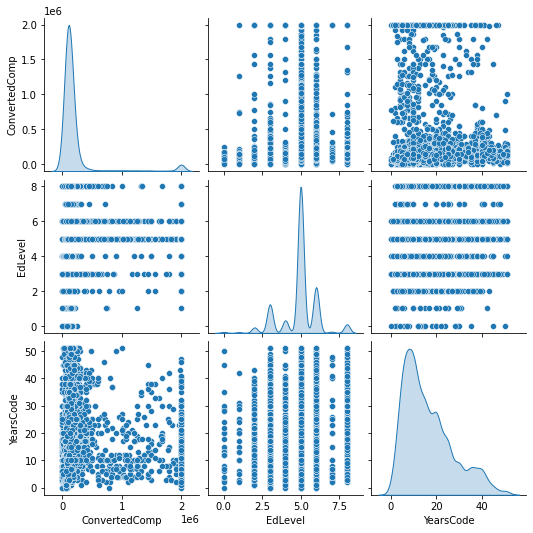

In [343]:
# pairplots to get an overview of potential correlations in the data
sns.pairplot(data_us[['ConvertedComp', 'EdLevel', 'YearsCode']], diag_kind='kde')

In [344]:
# Making sure data is floats and/or ints (ignoring Country), and that there are no null values
data_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8081 entries, 7 to 64152
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConvertedComp  8081 non-null   float64
 1   Country        8081 non-null   object 
 2   EdLevel        8081 non-null   int64  
 3   YearsCode      8081 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 315.7+ KB


In [345]:
data_us.describe()

,ConvertedComp,EdLevel,YearsCode
count,8.081000e+03,8081.000000,8081.000000
mean,2.091044e+05,4.921916,16.360475
std,3.732002e+05,1.161135,10.795505
min,0.000000e+00,0.000000,0.000000
25%,8.320000e+04,5.000000,8.000000
50%,1.150000e+05,5.000000,14.000000
75%,1.600000e+05,5.000000,22.000000
max,2.000000e+06,8.000000,51.000000


In [347]:
# Creating a save point to protect the data so far
data_us.to_csv('../datasets/views/2020/data-us-2020.csv', index=False)

## Working on the machine learning model with scikit-learn